<h1>Image Correction Tests</h1>
<p>- Here we will use the master flats and biases to calibrate images.</p>

In [25]:

'''
load images the same way as did last time
'''

import os
import collections 
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

#user specific path...
directory = '/Users/spencerfreeman/Desktop/stepUp/freeman2024-09-03'
transit_name = 'WASP-135b'
#this linked list stores float arrays of each image, these can be manipulated.


light_frame_indicator = "lrp"
flat_frame_indicator = "frp.fit"
bias_frame_indicator = "bias.fit"

'''
if it turns out we need more information from the fits images, then the file objects must be adjusted in these methods.
'''
#helper method
def print_guidance(name_indicator, directory):
    print("---------------------------------------------------------------------------------------------------------------------------------------------")
    print("loading images from {0} including the string {1}...".format(directory, name_indicator))
    print("---------------------------------------------------------------------------------------------------------------------------------------------")

#running method
def load_light_frames(directory, light_frame_indicator):
    light_frame_linkedlist = collections.deque()
    print_guidance(light_frame_indicator, directory)
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and light_frame_indicator in filename:
            file = fits.open(f)
            light_frame_linkedlist.append(file[0].data)
    return light_frame_linkedlist

def load_bias_frames(directory, bias_frame_indicator):
    print_guidance(bias_frame_indicator, directory)
    bias_frame_linkedlist = collections.deque()
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and bias_frame_indicator in filename:
            file = fits.open(f)
            bias_frame_linkedlist.append(file[0].data)
    return bias_frame_linkedlist

def load_flat_frames(directory, flat_frame_indicator):
    print_guidance(flat_frame_indicator, directory)
    flat_frame_linkedlist = collections.deque()
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and flat_frame_indicator in filename:
            file = fits.open(f)
            flat_frame_linkedlist.append(file[0].data)
    return flat_frame_linkedlist

#linked list storing lights wil now be stored in l
lights = load_light_frames(directory, light_frame_indicator)
flats = load_flat_frames(directory, flat_frame_indicator)
biases = load_bias_frames(directory, bias_frame_indicator)

print('total lights loaded: {0}'.format(len(lights)))
print('total flats loaded: {0}'.format(len(flats)))
print('total biases loaded: {0}'.format(len(biases)))
#plt.imshow(fits.open(os.path.join(directory, "mflat.fit"))[0].data)
# plt.imshow(lights[0])
# plt.imshow(flats[0])
 

---------------------------------------------------------------------------------------------------------------------------------------------
loading images from /Users/spencerfreeman/Desktop/stepUp/freeman2024-09-03 including the string lrp...
---------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------
loading images from /Users/spencerfreeman/Desktop/stepUp/freeman2024-09-03 including the string frp.fit...
---------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------
loading images from /Users/spencerfreeman/Desktop/stepUp/freeman2024-09-03 inclu

In [3]:
'''
return our array dimensions for resizing purposes...
'''
def return_dimensions(pixel_2d_array):
    return ([len(pixel_2d_array), len(pixel_2d_array[0])])

return_dimensions(flats[0])

[4096, 4096]

4096


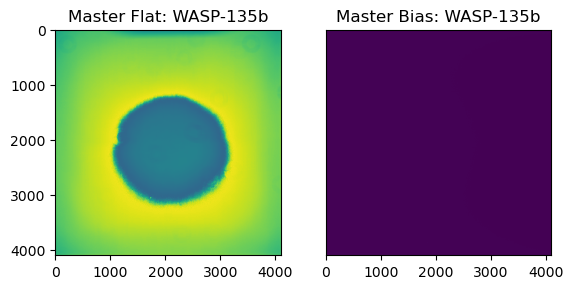

In [42]:
'''
Here we will take the average of across the flats and bias images to obtain master flats and biases.
If we only have one flat and/or bias loaded, we can skip this step.
'''
import matplotlib.ticker as ticker
fig, (ax1, ax2) = plt.subplots(1,2)

def average_flats(flats, biases, total_flats, total_biases):
    
    dimensions = return_dimensions(flats[0])
    print(dimensions[1])
    master_flat = [[0]*dimensions[1]]*dimensions[0]
    
    if(len(flats) == 0):
        print("***image load failure, please check path and retry.***")
    #case in which only one flat is present
    elif(len(flats) == 1):
        master_flat = flats[0]
        ax1.imshow(master_flat)
        ax1.set_title("Master Flat: {0}".format(transit_name))
        return master_flat
    elif(len(flats)>1):
        '''
        *to build a master flat image we will average the flats and then subtract the average of the biases.*
        '''
        flat_sum = sum(flats)
        bias_sum = sum(biases)
        average_flat = flat_sum/total_flats
        average_bias = bias_sum/total_biases
        master_flat = average_flat - average_bias
        ax1.imshow(master_flat)
        ax1.set_title("Master Flat: {0}".format(transit_name))
        return master_flat
      
    
    
def average_biases(biases, total_biases):
    if(len(biases) == 0):
        print("***image load failure, please check path and retry.***")
    elif(len(biases) == 1):
        master_bias = biases[0]
        pax2.imshow(master_bias)
        ax2.set_title("Master Bias: {0}".format(transit_name))
        return master_bias 
    elif(len(biases) > 1):
        bias_sum = sum(biases)
        master_bias = bias_sum/total_biases
        ax2.imshow(master_bias)
        ax2.set_title("Master Bias: {0}".format(transit_name))
        #hide the tick marks on the master bias plot
        ax2.yaxis.set_major_locator(ticker.NullLocator())
        return master_bias

        
master_flat = average_flats(flats, biases, len(flats), len(biases))
master_bias = average_biases(biases, len(biases))
